In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import yaml
import seaborn as sns

from utils import load_experiment_dir

sns.set(style="whitegrid")
sns.set_context('poster')
sns.set_palette("Set2")

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [465]:
var_test = load_experiment_dir("../exps/task1/two_headed_variance_testing/")

In [466]:
var_test.groupby('language')[['train_acc', 'dev_acc', 'test_acc']].agg(['mean', 'std', 'min', 'max']).T.round(4)

language        breton   latin  lithuanian
train_acc mean  0.9629  0.9258      0.9669
          std   0.0139  0.0321      0.0225
          min   0.9430  0.8457      0.9051
          max   0.9904  0.9714      0.9908
dev_acc   mean  0.8735  0.7473      0.8695
          std   0.0241  0.0317      0.0232
          min   0.8400  0.6900      0.8180
          max   0.9200  0.7910      0.9060
test_acc  mean  0.9165  0.7452      0.8848
          std   0.0075  0.0294      0.0196
          min   0.9000  0.6960      0.8340
          max   0.9300  0.7990      0.9090

In [467]:
l = var_test['language']
l.index.name = None
l.name = None

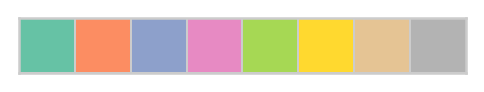

In [468]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [469]:
sns.color_palette("Set2", 8)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

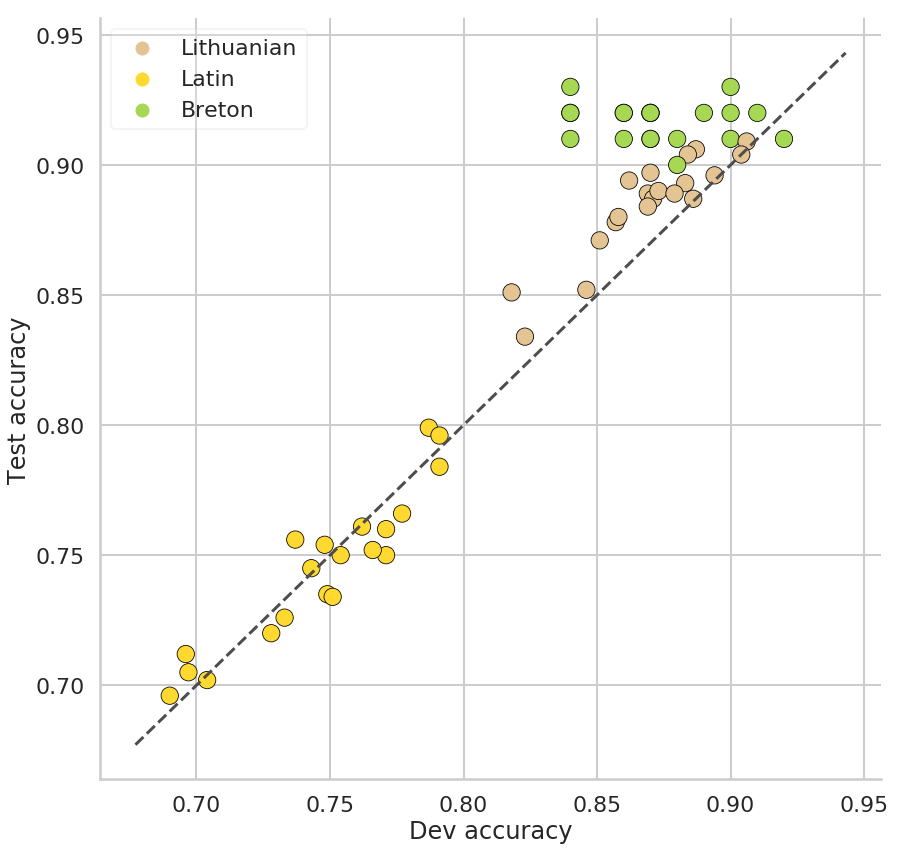

In [470]:
with sns.color_palette("Set2_r"):
    fig, ax = plt.subplots(1, figsize=(14, 14))
    sns.scatterplot(x=var_test['dev_acc'], y=var_test['test_acc'], hue=l.str.title(), ax=ax,
                    linewidth=.8, edgecolor="black", s=300)
    diag_min = min(ax.get_xlim()[0], ax.get_ylim()[0])
    diag_max = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.plot((diag_min, diag_max), (diag_min, diag_max), ls="--", c=".3")
    ax.set_xlabel("Dev accuracy")
    ax.set_ylabel("Test accuracy")
    ax.legend(framealpha=.2)
    sns.despine()
    #ax.grid(True)
    plt.savefig("fig/task1_seed.eps", transparent=True, bbox=True)

In [471]:
d = pd.read_table("tsv/CoNLL-SIGMORPHON Shared Task 1 Results - high.tsv")
d.tail()

,Unnamed: 0,waseda-01,uzh-02,uzh-01,ua-08,ua-07,ua-06,ua-05,ua-04,ua-03,...,iitbhu-iiith-02,iitbhu-iiith-01,iit-varanasi-01,hamburg-01,bme-03,bme-02,bme-01,baseline,axsemantics-02,axsemantics-01
82,north-frisian,92.000000,95.000000,94.000000,0,0,0,0,0,0,...,96.00000,96.00000,96.000000,83.000000,94.000000,95.000000,96.000000,37.000000,33.000000,80.000000
83,old-english,83.700000,87.900000,88.700000,0,0,0,0,0,0,...,86.00000,86.00000,83.400000,50.900000,87.100000,88.200000,87.100000,40.900000,34.300000,69.300000
84,polish,89.300000,93.400000,93.000000,0,0,0,0,0,0,...,88.70000,88.70000,82.800000,76.400000,89.300000,90.800000,89.300000,87.100000,82.900000,87.600000
85,russian,88.400000,94.400000,94.000000,0,0,0,0,0,0,...,91.00000,91.00000,85.400000,85.200000,90.400000,92.000000,90.400000,86.500000,76.100000,88.000000
86,average,91.115116,95.965116,96.004651,0,0,0,0,0,0,...,94.42907,94.42907,91.733721,77.531395,93.973256,94.662791,93.884884,75.298837,74.774419,84.188372


In [472]:
def read_sigm_table(fn):
    df = pd.read_table(fn)
    df = df.rename(columns={'Unnamed: 0': 'language'})
    df = df.rename(columns={'languages': 'language'})
    if df.iloc[-1]['language'] == 'average':
        df = df[:-1]
    return df

high = read_sigm_table("tsv/CoNLL-SIGMORPHON Shared Task 1 Results - high.tsv")
high['data_size'] = 'high'
medium = read_sigm_table("tsv/CoNLL-SIGMORPHON Shared Task 1 Results - medium.tsv")
medium['data_size'] = 'medium'
low = read_sigm_table("tsv/CoNLL-SIGMORPHON Shared Task 1 Results - low.tsv")
low['data_size'] = 'low'
ranking = pd.concat((high, medium, low), sort=True)

In [473]:
m = ranking.groupby('data_size').mean()
m

,axsemantics-02,baseline,bme-01,bme-02,bme-03,hamburg-01,iit-varanasi-01,iitbhu-iiith-01,iitbhu-iiith-02,kucst-01,...,ua-02,ua-03,ua-04,ua-05,ua-06,ua-07,ua-08,uzh-01,uzh-02,waseda-01
data_size,,,,,,,,,,,,,,,,,,,,,
high,74.774419,75.298837,93.884884,94.662791,93.973256,77.531395,91.733721,94.429070,94.429070,48.681395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.004651,95.965116,91.115116
low,14.740777,38.198058,3.742718,2.429126,3.634951,40.282524,23.330097,49.791262,52.596117,2.516505,...,39.187379,44.820388,21.250485,50.533981,49.733981,37.985437,53.215534,57.180583,57.213592,44.087379
medium,60.003922,61.775490,67.430392,67.258824,67.357843,74.028431,70.173529,82.895098,84.185294,29.118627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.643137,86.376471,77.383333


In [474]:
team_table = m.T
team_table['team'] = team_table.index.map(lambda t: '-'.join(t.split('-')[:-1]))
team_table.loc['baseline', 'team'] = 'baseline'
team_table['submission'] = team_table.index.map(lambda t: int(t.split('-')[-1]) if t.split('-')[-1] != 'baseline' else '')
team_table.loc['baseline', 'submission'] = ''
team_table.head()

data_size,high,low,medium,team,submission
axsemantics-02,74.774419,14.740777,60.003922,axsemantics,2
baseline,75.298837,38.198058,61.775490,baseline,
bme-01,93.884884,3.742718,67.430392,bme,1
bme-02,94.662791,2.429126,67.258824,bme,2
bme-03,93.973256,3.634951,67.357843,bme,3


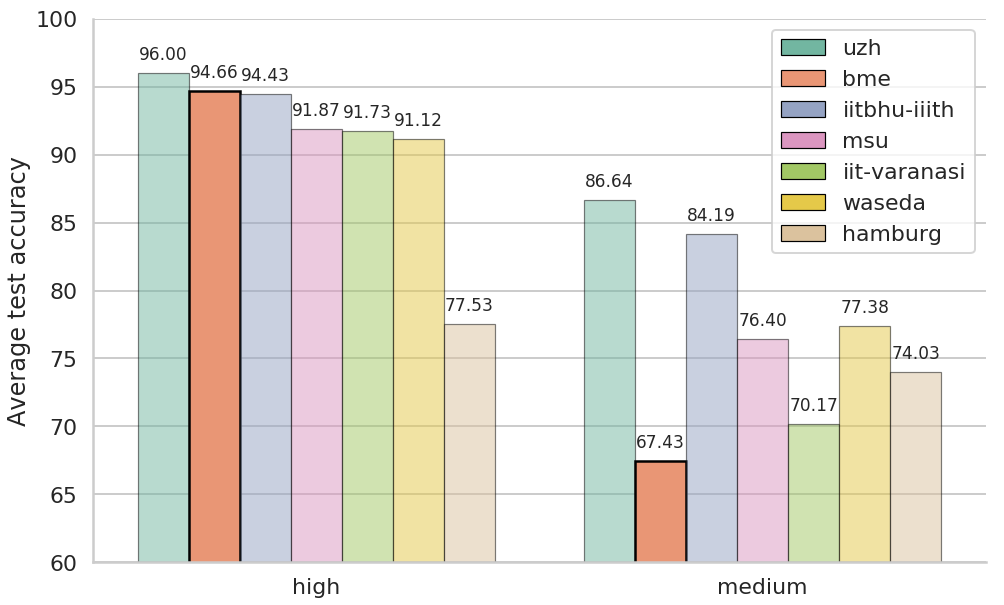

In [511]:
t = team_table.melt(id_vars=['team', 'submission'], value_vars=['high', 'medium', 'low'], value_name='acc')
best = t.sort_values('acc', ascending=False).groupby(['team', 'data_size']).head(1)
b = best.sort_values('acc', ascending=False).groupby('data_size').head(7)
b = b[b.data_size != 'low']
b = b.sort_values(['data_size', 'acc'], ascending=[True, False])
fig, ax = plt.subplots(1, figsize=(16, 10))
sns.barplot(x=b['data_size'], y=b['acc'], hue=b['team'], linewidth=1.2, edgecolor="black")
ax.legend(loc='upper right')
ax.set_xlabel("")
ax.set_ylabel("Average test accuracy")
teams = []
sns.despine(top=True)
for i in range(0, len(ax.patches), 2):
    patch = ax.patches[i]
    if i != 2:
        patch.set_alpha(.5)
    else:
        patch.set_linewidth(2.5)
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height() + 1
    acc = b.iloc[int(i/2)].acc
    ax.text(x, y, "{0:0.2f}".format(acc), ha="center", fontsize=17)
    teams.append(b.iloc[int(i/2)].team)
for i in range(0, int(len(ax.patches)//2)):
    patch = ax.patches[2*i+1]
    if i != 1:
        patch.set_alpha(.5)
    else:
        patch.set_linewidth(2.5)
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height() + 1
    acc = b[(b.team==teams[i]) & (b.data_size=='medium')].iloc[0].acc
    ax.text(x, y, "{0:0.2f}".format(acc), ha="center", fontsize=17)
ax.set_ylim(60, 100)
plt.savefig("fig/task1.png", dpi=300, transparent=True, bbox='tight')

In [476]:
task2 = pd.read_table("detailed_results_task_2.tsv", names=["track", "eval_type", "train_size", "language", "acc"])
task2 = task2[task2.eval_type=='original'].drop('eval_type', axis=1)

In [477]:
task2.train_size = pd.Categorical(task2.train_size, categories=['high', 'medium', 'low'], ordered=True)
task2.track = pd.Categorical(task2.track, categories=['track1', 'track2'], ordered=True)

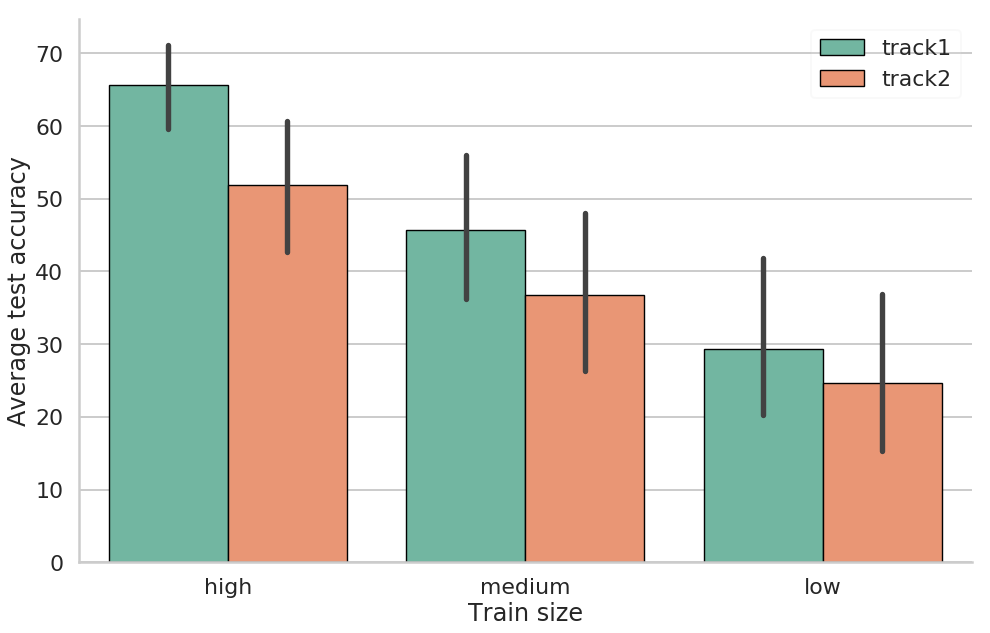

In [478]:
fig, ax = plt.subplots(1, figsize=(16, 10))
tr = task2.track
tr.name = None
sns.barplot(x=task2.train_size, y=task2.acc, hue=tr, ax=ax, linewidth=1.4, edgecolor="black")
ax.set_xlabel("Train size")
ax.set_ylabel("Average test accuracy")
ax.legend(framealpha=0.1)
sns.despine()
plt.savefig("fig/task2.eps", transparent=True, bbox='tight')